In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import load_model, save_model
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
df = pd.read_csv('Fertilizer-augmented_data.csv')

In [22]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,25,51,37,Sandy,Maize,36,0,0,Urea
1,27,53,39,Sandy,Maize,38,1,1,Urea
2,28,51,44,Loamy,Sugarcane,11,0,35,DAP
3,30,53,46,Loamy,Sugarcane,13,1,37,DAP
4,33,64,61,Black,Cotton,6,8,29,14-35-14
...,...,...,...,...,...,...,...,...,...
609,31,61,39,Sandy,Millets,11,1,15,20-20
610,29,59,39,Sandy,Millets,40,0,0,Urea
611,31,61,41,Sandy,Millets,42,1,1,Urea
612,35,59,42,Sandy,Millets,14,0,40,DAP


In [35]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [23]:
label_encoder = LabelEncoder()
df['Soil Type Encoded'] = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type Encoded'] = label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name Encoded'] = label_encoder.fit_transform(df['Fertilizer Name'])

In [24]:
data = pd.read_csv('FP-encoded_data_NN.csv')

In [25]:
data

,Unnamed: 0,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type Encoded,Crop Type Encoded,Fertilizer Name Encoded
0,0,25,51,37,Sandy,Maize,36,0,0,Urea,4,3,6
1,1,27,53,39,Sandy,Maize,38,1,1,Urea,4,3,6
2,2,28,51,44,Loamy,Sugarcane,11,0,35,DAP,2,8,5
3,3,30,53,46,Loamy,Sugarcane,13,1,37,DAP,2,8,5
4,4,33,64,61,Black,Cotton,6,8,29,14-35-14,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,31,61,39,Sandy,Millets,11,1,15,20-20,4,4,3
610,610,29,59,39,Sandy,Millets,40,0,0,Urea,4,4,6
611,611,31,61,41,Sandy,Millets,42,1,1,Urea,4,4,6
612,612,35,59,42,Sandy,Millets,14,0,40,DAP,4,4,5


In [26]:
X = data[['Temparature','Humidity ','Moisture','Soil Type Encoded','Crop Type Encoded','Nitrogen','Potassium','Phosphorous']]
Y = data['Fertilizer Name Encoded']

In [27]:
X

,Temparature,Humidity,Moisture,Soil Type Encoded,Crop Type Encoded,Nitrogen,Potassium,Phosphorous
0,25,51,37,4,3,36,0,0
1,27,53,39,4,3,38,1,1
2,28,51,44,2,8,11,0,35
3,30,53,46,2,8,13,1,37
4,33,64,61,0,1,6,8,29
...,...,...,...,...,...,...,...,...
609,31,61,39,4,4,11,1,15
610,29,59,39,4,4,40,0,0
611,31,61,41,4,4,42,1,1
612,35,59,42,4,4,14,0,40


In [28]:
Y

0      6
1      6
2      5
3      5
4      1
      ..
609    3
610    6
611    6
612    5
613    5
Name: Fertilizer Name Encoded, Length: 614, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=600, batch_size=64, validation_split=0.2)

7/7 [==============================] - 0s 5ms/step - loss: 2.0335 - accuracy: 0.1378 - val_loss: 3.0158 - val_accuracy: 0.2222
Epoch 6/600
7/7 [==============================] - 0s 5ms/step - loss: 3.1248 - accuracy: 0.1735 - val_loss: 2.1988 - val_accuracy: 0.2222
Epoch 7/600
7/7 [==============================] - 0s 5ms/step - loss: 1.6403 - accuracy: 0.1531 - val_loss: 1.1205 - val_accuracy: 0.1919
Epoch 8/600
7/7 [==============================] - 0s 5ms/step - loss: 1.0664 - accuracy: 0.1352 - val_loss: 1.3722 - val_accuracy: 0.1919
Epoch 9/600
7/7 [==============================] - 0s 5ms/step - loss: 0.9845 - accuracy: 0.1352 - val_loss: 0.8883 - val_accuracy: 0.2020
Epoch 10/600
7/7 [==============================] - 0s 5ms/step - loss: 0.7373 - accuracy: 0.1582 - val_loss: 0.7193 - val_accuracy: 0.2222
Epoch 11/600
7/7 [==============================] - 0s 5ms/step - loss: 0.7164 - accuracy: 0.1760 - val_loss: 0.6469 - val_accuracy: 0.2222
Epoch 12/600
7/7 [===================

In [14]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [15]:
save_model(model, 'FR_model.h5')

In [16]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [17]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.050291448341414205
R-squared (R2): 0.986622488888859


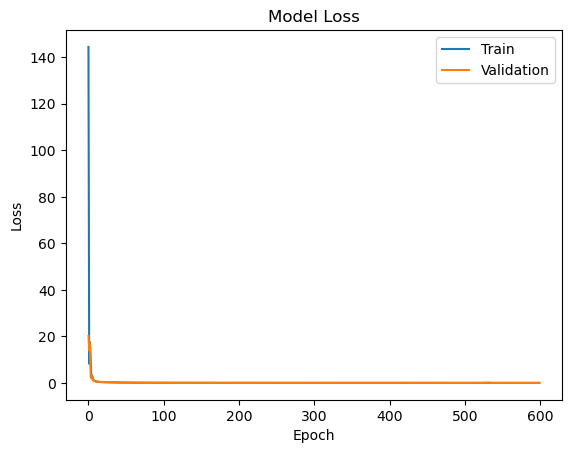

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

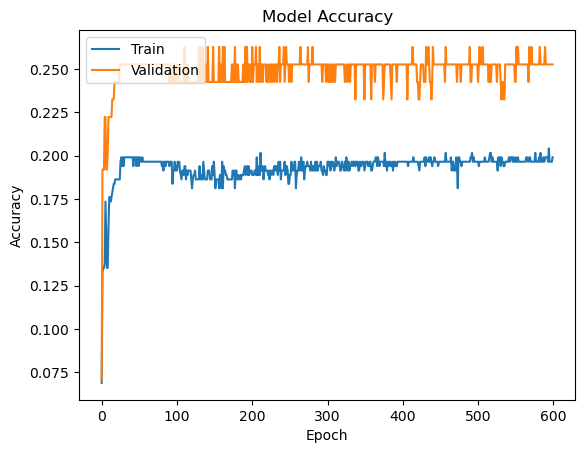

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()